# Eye Track Data

This notebook looks at eye gaze data from experiment 2, and re-analyzes the behavioral data controlling for gaze

In [1]:
import json; import re; import ast; import pandas as pd; from datetime import datetime; import time; import hypertools as hyp
import numpy as np; from matplotlib import pyplot as plt; import os; from matplotlib import patches as patches; import seaborn as sb
import warnings; import scipy; import pickle; import statsmodels.api as sm; import statsmodels.formula.api as smf
from statsmodels.formula.api import ols; import pingouin; from itertools import combinations;
from analysis_helpers import *; from pydoc import help; from scipy.stats.stats import pearsonr
warnings.filterwarnings('ignore')
%matplotlib inline

# Load Parsed Data

In [2]:
eye_df = pd.DataFrame.from_csv('/Users/kirstenziman/Documents/attention-memory-task/eye_df.csv')
behav_full = pd.DataFrame.from_csv('/Users/kirstenziman/Documents/attention-memory-task/behavioral.csv')

In [3]:
# eye_df[eye_df['av_x_coord']==0]

In [4]:
counting = eye_df.groupby(['Trial','Subject','Run'], as_index=False).count()
# counting['av_x_coord']

In [5]:
eye_df['Subject'].unique()
eye_df.loc[eye_df['Subject']==32,'Subject']=327

# familiarity by gaze and category

In [6]:
eye_behav = pd.merge(behav_full, eye_df.groupby(['Subject','Run','Trial'], as_index=False).mean(), on=['Subject','Trial','Run'])
eye_behav_full = pd.concat([eye_behav, behav_full[behav_full['Trial Type']=='Memory']])

In [7]:
eye_behav_full.to_csv('eye_behav_full.csv')
eye_behav.to_csv('eye_behav.csv')

In [8]:
# eye_behav_full

# +/- 1 data, +/- 1.5 data

In [9]:
behav_full[(behav_full['Subject']==10.0) 
              &(behav_full['Trial Type']=='Memory')
              &(behav_full['Attention Level']=='Novel')].shape

(160, 27)

In [10]:
five =  select_trials_2(behav_full, eye_df, 1.5)
one  =  select_trials_2(behav_full, eye_df, 1.0)

In [11]:
one.head()

,Unnamed: 0.1,Subject,Trial Type,Run,Cued Composite,Uncued Composite,Cued Face,Cued Place,Uncued Face,Uncued Place,...,Attention Level,Cue Validity,Post Invalid Cue,Pre Invalid Cue,Attention Button,Rating History,Stimulus Onset,Stimulus End,Attention Probe,Trial
33,53,1.0,Presentation,1.0,00265940128fb_sunabkmdplkdbvxriff.jpg,00957960627fa_sunavhxgmgrqsaptynb.jpg,00265940128fb.jpg,sunabkmdplkdbvxriff.jpg,00957960627fa.jpg,sunavhxgmgrqsaptynb.jpg,...,NaN,1.0,NaN,NaN,1.0,NaN,1.550775e+09,1.550775e+09,x,3.0
38,58,1.0,Presentation,1.0,00316940422fa_sunabxmguapjekttvwm.jpg,00719941201fa_sunadvithllcgmfxsrn.jpg,00316940422fa.jpg,sunabxmguapjekttvwm.jpg,00719941201fa.jpg,sunadvithllcgmfxsrn.jpg,...,NaN,1.0,NaN,NaN,1.0,NaN,1.550775e+09,1.550775e+09,x,8.0
15,105,1.0,Presentation,2.0,00796941205fa_sunaguchqqnrtodtezq.jpg,00804960530fa_sunagwswhkvnsmuszlz.jpg,00796941205fa.jpg,sunaguchqqnrtodtezq.jpg,00804960530fa.jpg,sunagwswhkvnsmuszlz.jpg,...,NaN,1.0,NaN,NaN,3.0,NaN,1.550775e+09,1.550775e+09,o,5.0
1,151,1.0,Presentation,3.0,00630941031fa_sunadakkdovnuzlycvp.jpg,00294940422fb_sunabrlndkruqokhury.jpg,00630941031fa.jpg,sunadakkdovnuzlycvp.jpg,00294940422fb.jpg,sunabrlndkruqokhury.jpg,...,NaN,1.0,NaN,NaN,3.0,NaN,1.550776e+09,1.550776e+09,o,1.0
41,251,1.0,Presentation,5.0,00564941031fa_sunacsaovnjezqwbykf.jpg,00081941031fa_sunaaftlyfudyzuhqzf.jpg,00564941031fa.jpg,sunacsaovnjezqwbykf.jpg,00081941031fa.jpg,sunaaftlyfudyzuhqzf.jpg,...,NaN,1.0,NaN,NaN,3.0,NaN,1.550777e+09,1.550777e+09,o,1.0


In [12]:
behav_full.ix[~behav_full['Memory Image'].str.contains("sun", na=False),'Category']='Face'
behav_full.ix[behav_full['Memory Image'].str.contains("sun", na=False),'Category']='Place'

In [13]:
l=[]
for sub in five['Subject'].unique():
    
    l.append(five[(five['Subject']==sub) 
              &(five['Trial Type']=='Memory')
              &(five['Attention Level']!='Novel')].shape[0]/float(8*20))

In [14]:
np.mean(l)

0.228125

In [15]:
l_five = []
for sub in five['Subject'].unique():
    if len(five[(five['Subject']==sub) & (five['Category']=='Face')]['Attention Level'].unique())==6 and len(five[(five['Subject']==sub) & (five['Category']=='Face')]['Attention Level'].unique())==6:
        l_five.append(sub)
print(len(l_five))

l_one = []
for sub in one['Subject'].unique():
    if len(one[(one['Subject']==sub) & (one['Category']=='Face')]['Attention Level'].unique())==6 and len(one[(one['Subject']==sub) & (one['Category']=='Face')]['Attention Level'].unique())==6:
        l_one.append(sub)
print(len(l_one))

15
7


In [16]:
five = five[five['Subject'].isin(l_five)]
one  = one[one['Subject'].isin(l_one)]
five_full = behav_full[behav_full['Subject'].isin(l_five)]


In [17]:
one.head()

,Unnamed: 0.1,Subject,Trial Type,Run,Cued Composite,Uncued Composite,Cued Face,Cued Place,Uncued Face,Uncued Place,...,Attention Level,Cue Validity,Post Invalid Cue,Pre Invalid Cue,Attention Button,Rating History,Stimulus Onset,Stimulus End,Attention Probe,Trial
33,53,1.0,Presentation,1.0,00265940128fb_sunabkmdplkdbvxriff.jpg,00957960627fa_sunavhxgmgrqsaptynb.jpg,00265940128fb.jpg,sunabkmdplkdbvxriff.jpg,00957960627fa.jpg,sunavhxgmgrqsaptynb.jpg,...,NaN,1.0,NaN,NaN,1.0,NaN,1.550775e+09,1.550775e+09,x,3.0
38,58,1.0,Presentation,1.0,00316940422fa_sunabxmguapjekttvwm.jpg,00719941201fa_sunadvithllcgmfxsrn.jpg,00316940422fa.jpg,sunabxmguapjekttvwm.jpg,00719941201fa.jpg,sunadvithllcgmfxsrn.jpg,...,NaN,1.0,NaN,NaN,1.0,NaN,1.550775e+09,1.550775e+09,x,8.0
15,105,1.0,Presentation,2.0,00796941205fa_sunaguchqqnrtodtezq.jpg,00804960530fa_sunagwswhkvnsmuszlz.jpg,00796941205fa.jpg,sunaguchqqnrtodtezq.jpg,00804960530fa.jpg,sunagwswhkvnsmuszlz.jpg,...,NaN,1.0,NaN,NaN,3.0,NaN,1.550775e+09,1.550775e+09,o,5.0
1,151,1.0,Presentation,3.0,00630941031fa_sunadakkdovnuzlycvp.jpg,00294940422fb_sunabrlndkruqokhury.jpg,00630941031fa.jpg,sunadakkdovnuzlycvp.jpg,00294940422fb.jpg,sunabrlndkruqokhury.jpg,...,NaN,1.0,NaN,NaN,3.0,NaN,1.550776e+09,1.550776e+09,o,1.0
41,251,1.0,Presentation,5.0,00564941031fa_sunacsaovnjezqwbykf.jpg,00081941031fa_sunaaftlyfudyzuhqzf.jpg,00564941031fa.jpg,sunacsaovnjezqwbykf.jpg,00081941031fa.jpg,sunaaftlyfudyzuhqzf.jpg,...,NaN,1.0,NaN,NaN,3.0,NaN,1.550777e+09,1.550777e+09,o,1.0


In [18]:
# behav_full[(behav_full['Category']=='Place')&(behav_full['Attention Level']=='Novel')]

# Loop

In [19]:
for s in one['Subject'].unique():
    print(one[(one['Subject']==s) & (one['Trial Type']=='Memory') & (one['Attention Level']=='Novel')].shape[0])

160
160
160
160
160
160
160


In [20]:
# one

In [21]:
sub_one = one.groupby(['Subject','Attention Level'], as_index=False).mean()

In [22]:
print(pingouin.rm_anova(dv='Familiarity Rating', within=['Attention Level'], subject='Subject', 
              data=one.groupby(['Subject','Attention Level'], as_index=False).mean()))

            Source  ddof1  ddof2      F     p-unc  p-GG-corr    np2    eps  \
0  Attention Level      4     24  4.758  0.005711   0.027323  0.442  0.528   

   sphericity  W-spher   p-spher  
0       False    0.011  0.017481  


In [23]:
one.groupby(['Attention Level'], as_index=False).mean()['Familiarity Rating']

0    1.977273
1    2.622642
2    2.069767
3    2.025385
4    2.339623
Name: Familiarity Rating, dtype: float64

In [24]:
one.groupby(['Attention Level'], as_index=False).mean()['Attention Level']

0    Category
1        Full
2        None
3       Novel
4        Side
Name: Attention Level, dtype: object

# Plot Full with Significance

behav_full
pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Side v.s. None: t-test paired samples, P_val=1.264e-03 stat=3.571e+00
Side v.s. Novel: t-test paired samples, P_val=1.593e-07 stat=6.850e+00
Side v.s. Category: t-test paired samples, P_val=1.084e-03 stat=3.629e+00
Side v.s. Full: t-test paired samples, P_val=6.009e-01 stat=5.289e-01
None v.s. Novel: t-test paired samples, P_val=4.716e-02 stat=2.073e+00
None v.s. Category: t-test paired samples, P_val=9.894e-01 stat=1.337e-02
None v.s. Full: t-test paired samples, P_val=3.301e-03 stat=-3.202e+00
Novel v.s. Category: t-test paired samples, P_val=6.019e-02 stat=-1.956e+00
Novel v.s. Full: t-test paired samples, P_val=3.226e-08 stat=-7.457e+00
Category v.s. Full: t-test paired samples, P_val=4.408e-04 stat=-3.964e+00


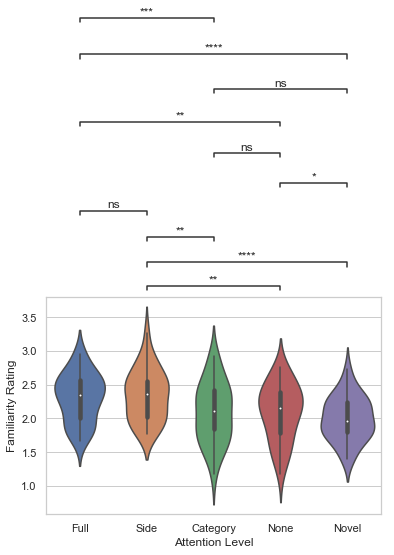


            Source  ddof1  ddof2       F         p-unc     p-GG-corr    np2  \
0  Attention Level      4    116  14.884  7.599156e-10  4.925814e-07  0.339   

     eps  sphericity  W-spher   p-spher  
0  0.639       False    0.239  0.000011  
one
pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Side v.s. None: t-test paired samples, P_val=2.867e-01 stat=1.169e+00
Side v.s. Novel: t-test paired samples, P_val=1.544e-01 stat=1.629e+00
Side v.s. Category: t-test paired samples, P_val=3.406e-01 stat=1.035e+00
Side v.s. Full: t-test paired samples, P_val=5.720e-02 stat=-2.348e+00
None v.s. Novel: t-test paired samples, P_val=7.137e-01 stat=3.848e-01
None v.s. Category: t-test paired samples, P_val=7.711e-01 stat=3.044e-01
None v.s. Full: t-test paired samples, P_val=6.657e-03 stat=-4.059e+00
Novel v.s. Category: t-test paired samples, P_val=8.546e-01 stat=1.913e-01
Novel v.s. F

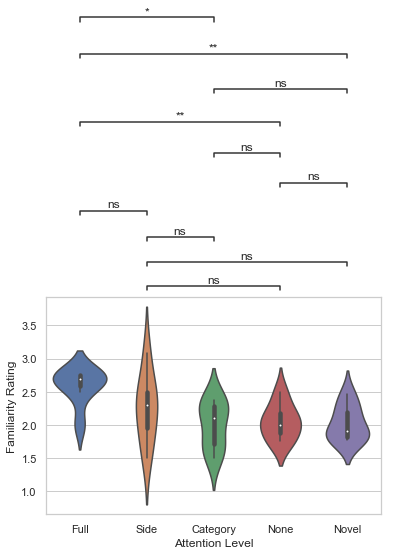


            Source  ddof1  ddof2      F     p-unc  p-GG-corr    np2    eps  \
0  Attention Level      4     24  4.758  0.005711   0.027323  0.442  0.528   

   sphericity  W-spher   p-spher  
0       False    0.011  0.017481  


In [43]:
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
sb.set(style="whitegrid")
df = sb.load_dataset("tips")

pair = combinations(behav_full['Attention Level'].unique(),2) 
l = [i for i in pair]

for dat,name in zip([behav_full, one],['behav_full','one']):
    print(name)
    data = dat.groupby(['Subject','Attention Level'], as_index=False).mean()
    x='Attention Level'; y='Familiarity Rating'; order=['Full','Side','Category','None','Novel']

    ax = sb.violinplot(x=x, y=y, data=data, order=order)  
    add_stat_annotation(ax, data=data, x=x, y=y, order=order, boxPairList=l[5:],test='t-test_paired', textFormat='star', loc='outside', verbose=3)

    plt.show()
    print()

    print(pingouin.rm_anova(dv='Familiarity Rating', within=['Attention Level'], subject='Subject', 
                  data=dat))

In [26]:
one.columns

Index(['Unnamed: 0.1', 'Subject', 'Trial Type', 'Run', 'Cued Composite',
       'Uncued Composite', 'Cued Face', 'Cued Place', 'Uncued Face',
       'Uncued Place', 'Memory Image', 'Category', 'Cued Side',
       'Cued Category', 'Attention Reaction Time (s)',
       'Familiarity Reaction Time (s)', 'Familiarity Rating',
       'Attention Level', 'Cue Validity', 'Post Invalid Cue',
       'Pre Invalid Cue', 'Attention Button', 'Rating History',
       'Stimulus Onset', 'Stimulus End', 'Attention Probe', 'Trial'],
      dtype='object')

In [38]:
grp = one.groupby(['Subject','Cue Validity'],as_index=False).mean() #['Attention Reaction Time (s)']

In [39]:
scipy.stats.ttest_ind(grp[grp['Cue Validity']==1]['Attention Reaction Time (s)'], 
                      grp[grp['Cue Validity']==0]['Attention Reaction Time (s)'])

Ttest_indResult(statistic=2.374808576370557, pvalue=0.04157998873351676)

# Plot Face / Place with Significance


Face, behav_full
pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Side v.s. None: t-test paired samples, P_val=2.530e-01 stat=1.166e+00
Side v.s. Novel: t-test paired samples, P_val=2.086e-04 stat=4.238e+00
Side v.s. Category: t-test paired samples, P_val=9.140e-03 stat=2.794e+00
Side v.s. Full: t-test paired samples, P_val=3.560e-01 stat=9.380e-01
None v.s. Novel: t-test paired samples, P_val=3.700e-02 stat=2.186e+00
None v.s. Category: t-test paired samples, P_val=1.243e-01 stat=1.583e+00
None v.s. Full: t-test paired samples, P_val=5.887e-01 stat=-5.468e-01
Novel v.s. Category: t-test paired samples, P_val=3.730e-01 stat=-9.048e-01
Novel v.s. Full: t-test paired samples, P_val=1.614e-03 stat=-3.478e+00
Category v.s. Full: t-test paired samples, P_val=3.121e-02 stat=-2.264e+00


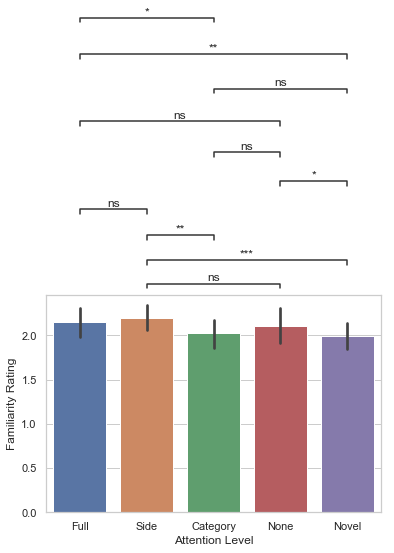

            Source  ddof1  ddof2      F     p-unc  p-GG-corr    np2    eps  \
0  Attention Level      4    116  4.448  0.002216   0.008262  0.133  0.665   

   sphericity  W-spher   p-spher  
0       False    0.381  0.001712  

Face, one
pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Side v.s. None: t-test paired samples, P_val=6.483e-02 stat=2.257e+00
Side v.s. Novel: t-test paired samples, P_val=5.774e-03 stat=4.186e+00
Side v.s. Category: t-test paired samples, P_val=5.896e-01 stat=5.696e-01
Side v.s. Full: t-test paired samples, P_val=4.202e-01 stat=8.652e-01
None v.s. Novel: t-test paired samples, P_val=7.864e-01 stat=-2.834e-01
None v.s. Category: t-test paired samples, P_val=6.636e-01 stat=-4.573e-01
None v.s. Full: t-test paired samples, P_val=2.097e-01 stat=-1.405e+00
Novel v.s. Category: t-test paired samples, P_val=6.902e-01 stat=-4.185e-01
Novel v.s. Full: t-t

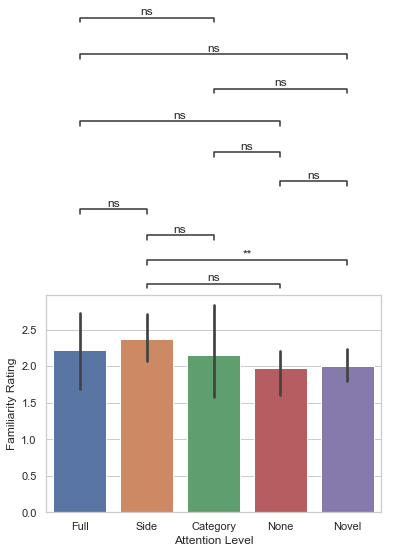

            Source  ddof1  ddof2      F     p-unc  p-GG-corr    np2    eps  \
0  Attention Level      4     24  0.691  0.605483   0.486583  0.103  0.378   

   sphericity  W-spher  p-spher  
0       False    0.007  0.00947  

Place, behav_full
pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Side v.s. None: t-test paired samples, P_val=4.317e-04 stat=3.972e+00
Side v.s. Novel: t-test paired samples, P_val=1.416e-06 stat=6.043e+00
Side v.s. Category: t-test paired samples, P_val=1.187e-03 stat=3.595e+00
Side v.s. Full: t-test paired samples, P_val=8.011e-01 stat=-2.542e-01
None v.s. Novel: t-test paired samples, P_val=1.332e-01 stat=1.545e+00
None v.s. Category: t-test paired samples, P_val=9.713e-01 stat=-3.634e-02
None v.s. Full: t-test paired samples, P_val=3.505e-04 stat=-4.049e+00
Novel v.s. Category: t-test paired samples, P_val=1.272e-01 stat=-1.570e+00
Novel v.s. Ful

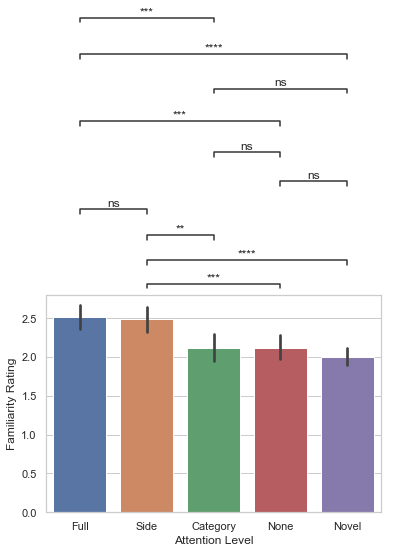

            Source  ddof1  ddof2       F         p-unc     p-GG-corr    np2  \
0  Attention Level      4    116  14.872  7.716434e-10  6.325443e-08  0.339   

     eps  sphericity  W-spher   p-spher  
0  0.754       False    0.472  0.014728  

Place, one
pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Side v.s. None: t-test paired samples, P_val=7.021e-01 stat=4.013e-01
Side v.s. Novel: t-test paired samples, P_val=5.337e-01 stat=6.602e-01
Side v.s. Category: t-test paired samples, P_val=4.400e-01 stat=8.268e-01
Side v.s. Full: t-test paired samples, P_val=4.100e-01 stat=-8.854e-01
None v.s. Novel: t-test paired samples, P_val=8.960e-01 stat=1.363e-01
None v.s. Category: t-test paired samples, P_val=6.326e-01 stat=5.034e-01
None v.s. Full: t-test paired samples, P_val=1.668e-01 stat=-1.573e+00
Novel v.s. Category: t-test paired samples, P_val=4.863e-01 stat=7.416e-01
Novel

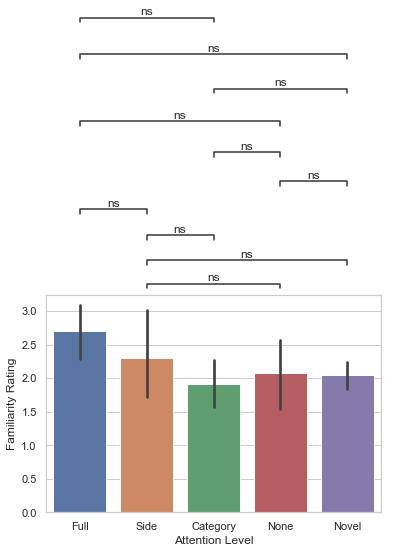

            Source  ddof1  ddof2      F     p-unc  p-GG-corr   np2    eps  \
0  Attention Level      4     24  1.318  0.291658   0.303423  0.18  0.545   

   sphericity  W-spher   p-spher  
0       False    0.015  0.030727  


In [33]:
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
sb.set(style="whitegrid")
df = sb.load_dataset("tips")

pair = combinations(behav_full['Attention Level'].unique(),2) 
l = [i for i in pair]

for cat in ['Face','Place']:   
    for dat,name in zip([behav_full, one],['behav_full','one']):
        
        print(); print(cat + ', '+str(name))
        data = dat[dat['Category']==cat].groupby(['Subject','Attention Level'], as_index=False).mean()
        x='Attention Level'; y='Familiarity Rating'; order=['Full','Side','Category','None','Novel']
    
        ax = sb.barplot(x=x, y=y, data=data, order=order)  
        add_stat_annotation(ax, data=data, x=x, y=y, order=order, boxPairList=l[5:],test='t-test_paired', textFormat='star', loc='outside', verbose=2)

        plt.show()

        print(pingouin.rm_anova(dv='Familiarity Rating', within=['Attention Level'], subject='Subject', 
                      data=dat[dat['Category']==cat]))

In [34]:
print(pingouin.rm_anova(dv='Familiarity Rating', within=['Attention Level','Category'], subject='Subject', 
              data=five.groupby(['Subject','Attention Level','Category'], as_index=False).mean()))

                       Source     SS  ddof1  ddof2     MS      F     p-unc  \
0             Attention Level  3.340      4     52  0.835  6.153  0.000394   
1                    Category  0.642      1     13  0.642  1.483  0.244987   
2  Attention Level * Category  2.874      4     52  0.719  5.591  0.000805   

   p-GG-corr    np2    eps  
0   0.003147  0.321  0.627  
1   0.244987  0.102  1.000  
2   0.014847  0.301  0.413  


In [35]:
# behav_full

In [36]:
groupy = five.groupby(['Subject','Attention Level','Category'], as_index=False).mean()
groupy_face  =  groupy[groupy['Category']=='Face']
groupy_place =  groupy[groupy['Category']=='Place']

In [37]:
import scipy 

pair = combinations(groupy_face['Attention Level'].unique(),2) 
   
for i in list(pair): 
    print(i)
    p = scipy.stats.ttest_rel(groupy_face[groupy_face['Attention Level']==i[0]]['Familiarity Rating'], 
                          groupy_face[groupy_face['Attention Level']==i[1]]['Familiarity Rating'])
    print(p)
    print(' ')

('Category', 'Full')
Ttest_relResult(statistic=-1.6800405565973537, pvalue=0.11511661958682844)
 
('Category', 'None')
Ttest_relResult(statistic=-2.990614381914223, pvalue=0.009730840889518706)
 
('Category', 'Novel')
Ttest_relResult(statistic=-0.5970168250031995, pvalue=0.5600281240105661)
 
('Category', 'Side')
Ttest_relResult(statistic=nan, pvalue=nan)
 
('Full', 'None')
Ttest_relResult(statistic=-0.8600416521374323, pvalue=0.4042537203373835)
 
('Full', 'Novel')
Ttest_relResult(statistic=2.200000446921139, pvalue=0.045100258036404155)
 
('Full', 'Side')
Ttest_relResult(statistic=nan, pvalue=nan)
 
('None', 'Novel')
Ttest_relResult(statistic=2.5735440488826664, pvalue=0.022084706836896124)
 
('None', 'Side')
Ttest_relResult(statistic=nan, pvalue=nan)
 
('Novel', 'Side')
Ttest_relResult(statistic=nan, pvalue=nan)
 


In [31]:
import scipy 

pair = combinations(groupy_place['Attention Level'].unique(),2) 
   
for i in list(pair): 
    print(i)
    p = scipy.stats.ttest_rel(groupy_place[groupy_place['Attention Level']==i[0]]['Familiarity Rating'], 
                          groupy_place[groupy_place['Attention Level']==i[1]]['Familiarity Rating'])
    print(p)
    print(' ')

NameError: name 'groupy_place' is not defined

In [36]:
groupy.head()

,Subject,Attention Level,Category,Unnamed: 0.1,Run,Attention Reaction Time (s),Familiarity Reaction Time (s),Familiarity Rating,Cue Validity,Post Invalid Cue,Pre Invalid Cue,Attention Button,Rating History,Stimulus Onset,Stimulus End,Trial
0,0.0,Category,Face,211.000000,3.600000,NaN,1.447400,1.800000,NaN,NaN,NaN,NaN,NaN,1.550772e+09,1.550772e+09,NaN
1,0.0,Category,Place,227.833333,4.000000,NaN,1.259000,2.000000,NaN,NaN,NaN,NaN,NaN,1.550772e+09,1.550772e+09,NaN
2,0.0,Full,Face,201.000000,3.333333,NaN,0.802000,2.000000,NaN,NaN,NaN,NaN,NaN,1.550772e+09,1.550772e+09,NaN
3,0.0,Full,Place,178.833333,3.000000,NaN,1.282000,3.166667,NaN,NaN,NaN,NaN,NaN,1.550771e+09,1.550771e+09,NaN
4,0.0,None,Face,235.166667,4.000000,NaN,1.108833,2.333333,NaN,NaN,NaN,NaN,NaN,1.550772e+09,1.550772e+09,NaN


In [37]:
# for cat in ['Face','Place']:   
#     for dat,name in zip([behav_full, five, one],['full data','five','one']):
#         d = dat.groupby(['Subject','Attention Level','Category'],as_index=False).mean()
#         print()
#         print(cat+' '+name)
#         print()
#         print(pd.DataFrame(t_tester(d[d['Category']==cat])))
#         print('----------------------')

In [38]:
# sb.scatterplot(x=t_tester(d[d['Category']==cat]).keys(), y=t_tester(d[d['Category']==cat]))

In [39]:
five[five['Subject']==sub]['Attention Level'].unique()

array([], dtype=object)

In [40]:
l = []
for sub in five['Subject'].unique():
    if len(five[(five['Subject']==sub) & (five['Category']=='Face')]['Attention Level'].unique())==6 and len(five[(five['Subject']==sub) & (five['Category']=='Face')]['Attention Level'].unique())==6:
        l.append(sub)
print(len(l))
#five.groupby(['Subject','Category','Attention Level'],as_index=False).count()

15


In [41]:
trials=0
for sub in grouped_three['Subject'].unique():
    #print(grouped_three.loc[(grouped_three['Subject']==sub)].shape[0])
    trials += grouped_three.loc[(grouped_three['Subject']==sub)].shape[0]
print(trials)
print(trials/(40*8*30))

NameError: name 'grouped_three' is not defined

In [ ]:
# grp

In [44]:
pres=pd.concat(p_df)

sb.barplot(x=pres['Cue Validity'], y=pres['Attention Reaction Time (s)'])
grp = pres.groupby(['Subject','Cue Validity'], as_index=False).mean()


scipy.stats.ttest_rel(grp[grp['Cue Validity']==True]['Attention Reaction Time (s)'], 
                grp[grp['Cue Validity']==False]['Attention Reaction Time (s)'])

NameError: name 'p_df' is not defined

In [45]:
scipy.stats.ttest_ind(behav_three['Cue Validity'], behav_three['Attention Reaction Time (s)'])
# behav_three['Cue Validity']

NameError: name 'behav_three' is not defined

In [46]:
grouped_three = behav_three.groupby(['Subject','Attention Level','Category'],as_index=False).mean()

NameError: name 'behav_three' is not defined

# Exp 2 - Gaze 1x1

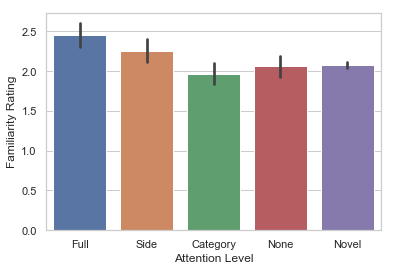

In [47]:
sns_plot = sb.barplot(y='Familiarity Rating', x='Attention Level',
                      data=five,
               order=['Full','Side','Category','None','Novel'])
fig = sns_plot.get_figure()
fig.savefig("Exp2_1Box.pdf")

In [48]:
sns_plot = sb.barplot(y='Familiarity Rating', x='Attention Level',
                      data=grouped_three[grouped_three['Category']=='Place'],
               order=['Full','Side','Category','None','Novel'])
fig = sns_plot.get_figure()
fig.savefig("Exp2_1Box.pdf")

NameError: name 'grouped_three' is not defined

In [49]:
pingouin.rm_anova(dv='Familiarity Rating', within=['Attention Level'], subject='Subject', 
                  data=grouped_three[grouped_three['Category']=='Place'])

NameError: name 'grouped_three' is not defined

In [50]:
# grouped_again
pair = combinations(behav_full['Attention Level'].unique(),2) 
l = [i for i in pair]

In [51]:
grouped_again = grouped_three.groupby(['Subject', 'Attention Level'], as_index=False).mean()
pair = combinations(grouped_three['Attention Level'].unique(),2) 
   
for i in list(pair):    
    p = scipy.stats.ttest_ind(grouped_again[grouped_again['Attention Level']==i[0]]['Familiarity Rating'], 
                          grouped_again[grouped_again['Attention Level']==i[1]]['Familiarity Rating'])
    
    #if p[1] <.05:
    print(i)
    print('p = ' + str(p))
    print(' ')

NameError: name 'grouped_three' is not defined

In [52]:
import itertools
from scipy import stats
l = ['Full', 'Category','Side','None']#grouped_three['Attention Level'].unique()
for pair in list(itertools.combinations(l, r=2)):
    
    t = stats.ttest_ind(grouped_three[grouped_three['Attention Level']==pair[0]]['Familiarity Rating'],
                        grouped_three[grouped_three['Attention Level']==pair[1]]['Familiarity Rating'])
    
    #if t[1]<.05:
    print(pair[0]+" vs. "+pair[1])
    print(t)
    
#pingouin.ttest()

NameError: name 'grouped_three' is not defined

# Exp 2 - All Gaze

In [53]:
behav_full['Attention Level'].unique()

array([nan, 'Side', 'None', 'Novel', 'Category', 'Full'], dtype=object)

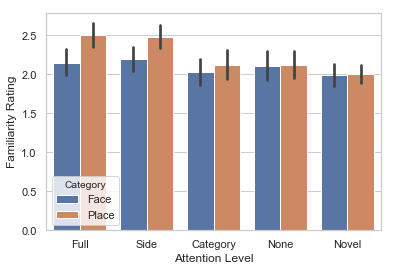

In [54]:
groupy = behav_full.groupby(['Subject','Category', 'Attention Level'], as_index=False).mean()
sns_plot = sb.barplot(y='Familiarity Rating', x='Attention Level', data=groupy, hue='Category',
             order=['Full','Side','Category','None','Novel'])


fig = sns_plot.get_figure()
fig.savefig("Exp2_AllGaze.pdf")

In [55]:
pingouin.rm_anova(dv='Familiarity Rating', within=['Attention Level','Category'], subject='Subject', data=groupy)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Attention Level,5.852,4,116,1.463,15.486,3.536122e-10,1.277531e-07,0.348,0.684
1,Category,1.721,1,29,1.721,8.022,8.318145e-03,8.318145e-03,0.217,1.000
2,Attention Level * Category,1.575,4,116,0.394,6.040,1.887279e-04,2.846625e-03,0.172,0.560


In [56]:
behav_three.to_csv('behav_three.csv')

NameError: name 'behav_three' is not defined

In [57]:
behav_full.head()

,Unnamed: 0.1,Subject,Trial Type,Run,Cued Composite,Uncued Composite,Cued Face,Cued Place,Uncued Face,Uncued Place,...,Attention Level,Cue Validity,Post Invalid Cue,Pre Invalid Cue,Attention Button,Rating History,Stimulus Onset,Stimulus End,Attention Probe,Trial
0,150,8.0,Presentation,3.0,00532960627fa_sunaccdtpgenvcbcbcf.jpg,00288940422fa_sunabppokiyglaxpcha.jpg,00532960627fa.jpg,sunaccdtpgenvcbcbcf.jpg,00288940422fa.jpg,sunabppokiyglaxpcha.jpg,...,NaN,1.0,NaN,NaN,1.0,NaN,1.551381e+09,1.551381e+09,x,0.0
1,151,8.0,Presentation,3.0,00787960620fa_sunagoufulkpsxrmklt.jpg,00857940307fa_sunaiwfobocrruqznsv.jpg,00787960620fa.jpg,sunagoufulkpsxrmklt.jpg,00857940307fa.jpg,sunaiwfobocrruqznsv.jpg,...,NaN,1.0,NaN,NaN,3.0,NaN,1.551381e+09,1.551381e+09,o,1.0
2,152,8.0,Presentation,3.0,00130931230fa_sunaamvxnvouicstkjb.jpg,00568940928fa_sunacsdhbbsybcyxnel.jpg,00130931230fa.jpg,sunaamvxnvouicstkjb.jpg,00568940928fa.jpg,sunacsdhbbsybcyxnel.jpg,...,NaN,1.0,NaN,NaN,1.0,NaN,1.551381e+09,1.551381e+09,x,2.0
3,153,8.0,Presentation,3.0,00967960627fa_sunbaejotfklekvpxcz.jpg,00929960627fa_sunaprnrbmgkomdbchr.jpg,00967960627fa.jpg,sunbaejotfklekvpxcz.jpg,00929960627fa.jpg,sunaprnrbmgkomdbchr.jpg,...,NaN,1.0,NaN,NaN,1.0,NaN,1.551381e+09,1.551381e+09,x,3.0
4,154,8.0,Presentation,3.0,00062931230fb_sunaaelotvjgibjtjhs.jpg,00663941121fa_sunadnjjzohjhbohlwq.jpg,00062931230fb.jpg,sunaaelotvjgibjtjhs.jpg,00663941121fa.jpg,sunadnjjzohjhbohlwq.jpg,...,NaN,1.0,NaN,NaN,3.0,NaN,1.551381e+09,1.551381e+09,o,4.0


In [58]:
eye_df.groupby(['Subject','Run','Trial'], as_index=False).mean().head()

,Subject,Run,Trial,fix,state,time,timestamp,xRaw_righteye,yRaw_righteye,xRaw_lefteye,yRaw_lefteye,av_x_coord,av_y_coord
0,0.0,1.0,0.0,0.814815,7.0,2.874117e+08,1.550771e+09,1015.228583,548.307868,1061.712559,545.402206,30.322529,15.949939
1,0.0,1.0,1.0,1.000000,7.0,2.874196e+08,1.550771e+09,986.458399,543.586427,1053.526547,545.228691,29.782983,15.878554
2,0.0,1.0,2.0,1.000000,7.0,2.874266e+08,1.550771e+09,1002.071725,549.426205,1056.637501,564.589679,30.056351,16.246065
3,0.0,1.0,3.0,0.876543,7.0,2.874346e+08,1.550771e+09,980.632600,544.348123,1039.681690,561.209683,29.495799,16.122718
4,0.0,1.0,4.0,0.729730,7.0,2.874417e+08,1.550771e+09,1046.032272,554.593077,1121.626199,563.775549,31.646967,16.309542


In [60]:
eye_df[''.columns

Index(['avg', 'fix', 'lefteye', 'raw', 'righteye', 'state', 'time',
       'timestamp', 'xRaw_righteye', 'yRaw_righteye', 'xRaw_lefteye',
       'yRaw_lefteye', 'av_x_coord', 'av_y_coord', 'Run', 'Subject', 'Trial'],
      dtype='object')

In [64]:
behav_full['Cued Side']

0        >
1        <
2        <
3        >
4        <
5        >
6        <
7        >
8        <
9        >
10       <
11       >
12       >
13       >
14       >
15       <
16       <
17       <
18       >
19       <
20       <
21       >
22       >
23       <
24       >
25       <
26       >
27       <
28       >
29       <
      ... 
370    NaN
371    NaN
372    NaN
373    NaN
374    NaN
375    NaN
376    NaN
377    NaN
378    NaN
379    NaN
380    NaN
381    NaN
382    NaN
383    NaN
384    NaN
385    NaN
386    NaN
387    NaN
388    NaN
389    NaN
390    NaN
391    NaN
392    NaN
393    NaN
394    NaN
395    NaN
396    NaN
397    NaN
398    NaN
399    NaN
Name: Cued Side, Length: 12000, dtype: object

In [59]:
list(eye_df['Subject'])==[int(x) for x in list(behav_full['Subject'])]
eye_df['Subject'][32718]

32718    8.0
32718    5.0
Name: Subject, dtype: float64

# Do av x coord gaze regression

In [ ]:
behav_three[behav_three['Trial Type']=='Presentation']

In [ ]:
gaze_three_group.head(n=2)

In [ ]:
gaze_three_group = pd.concat(gaze_three).groupby(['Subject','Run','Trial'], as_index=False).mean()
grouped_three['x_gaze'] = gaze_three_group['av_x_coord']

In [ ]:
grouped_three['x_diff']=grouped_three['x_gaze']-59.8/2

In [ ]:
p_df=pd.concat(p_df)

In [ ]:
for sub in behav_three['Subject'].unique():
    for run in behav_three['Run'].unique():
        for trial in behav_three['Trial'].unique():
            behav_three.loc[(behav_three.Subject==sub) & (behav_three.Run==run) & (behav_three.Trial==trial), 'Cued Side'] = 'yes'#str(p_df.loc[(p_df['Subject']==sub) & (p_df['Run']==run) & (p_df['Trial']==trial)]['Cued Side'])

In [ ]:
behav_three.head()

In [ ]:
sb.scatterplot(grouped_three[grouped_three['Attention Level']=='Category']['Familiarity Rating'], 
               abs(grouped_three[grouped_three['Attention Level']=='Category']['x_diff']))

In [ ]:
max(grouped_three['x_diff'])

In [42]:
props = []
for x in behav_three['Subject'].unique():
    k=0
    for y in behav_three[behav_three['Subject']==x]['Run'].unique():
        z = behav_three[(behav_three['Subject']==x)
                        &(behav_three['Run']==y) 
                        &(behav_three['Attention Level']!='Novel')]
        #print(len(z)-1)
        k+=len(z)-1
    props.append(k/80)
sb.violinplot(props)

NameError: name 'behav_three' is not defined

### ANOVA Three Box - Exp 2

In [43]:
pingouin.rm_anova(dv='Familiarity Rating', within=['Attention Level','Category'], subject='Subject', data=grouped_three)

NameError: name 'grouped_three' is not defined

In [30]:
#behav_full['Memory Image']
len(behav_full['Subject'].unique())

30

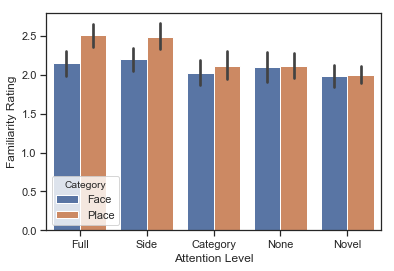

In [31]:
behav_full.ix[behav_full['Memory Image'].str.contains("sun", na=False),'Category']='Place'
behav_full.ix[~behav_full['Memory Image'].str.contains("sun", na=False),'Category']='Face'

groupy = behav_full.groupby(['Subject','Category', 'Attention Level'], as_index=False).mean()
sb.barplot(y='Familiarity Rating', x='Attention Level', hue='Category', data=groupy, 
           order=['Full','Side','Category','None','Novel'])

In [24]:
pingouin.rm_anova(dv='Familiarity Rating', within=['Attention Level','Category'], subject='Subject', data=groupy)



,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Attention Level,5.852,4,116,1.463,15.486,3.536122e-10,1.277531e-07,0.348,0.684
1,Category,1.721,1,29,1.721,8.022,8.318145e-03,8.318145e-03,0.217,1.000
2,Attention Level * Category,1.575,4,116,0.394,6.040,1.887279e-04,2.846625e-03,0.172,0.560


In [25]:
def gaze_plot(df_list):

    middle = 2048/2.0
    quarter = (1304-744)/4.0

    fig = plt.figure()
    ax1 = fig.add_subplot(111, aspect='equal')

    for x in df_list:
#         if x['Cued Side'].all()=='>' and x['Cued Category'].all()=='Place':
#             color='green'
#         elif x['Cued Side'].all()=='>' and x['Cued Category'].all()=='Face':
#             color='blue'
#         elif x['Cued Side'].all()=='<' and x['Cued Category'].all()=='Place':
#             color='orange'
#         else:
#             color='red'

#         x['Color']=color

        ax1.plot(x['av_x_coord'], x['av_y_coord'], '.')
        #props.append(x.loc[(x['av_x_coord']>middle-quarter) & (x['av_x_coord']<middle+quarter)])

    rect1 = patches.Rectangle(((59.8/2.0)-8-3.5,(33.6/2)-3.5),7,7,linewidth=1,edgecolor='black',facecolor='none')
    rect2 = patches.Rectangle(((59.8/2.0)+8-3.5,(33.6/2)-3.5),7,7,linewidth=1,edgecolor='black',facecolor='none')
#     rect3 = patches.Rectangle(((59.8/2.0)-1,(33.6/2)-1),2,2,linewidth=1,edgecolor='black',facecolor='none')
    rect4 = patches.Rectangle(((59.8/2.0)-1,(33.6/2)-1),2,2,linewidth=1,edgecolor='black',facecolor='none')
    #rect5 = patches.Rectangle(((59.8/2.0)-2,(33.6/2)-2),4,4,linewidth=1,edgecolor='black',facecolor='none')
    #rect6 = patches.Rectangle(((59.8/2.0)-3,(33.6/2)-3),6,6,linewidth=1,edgecolor='black',facecolor='none')
    #rect6 = patches.Rectangle(((59.8/2.0)-4.4,(33.6/2)-4.4),8.8,8.8,linewidth=1,edgecolor='black',facecolor='none')






    # Add the patch to the Axes
    ax1.add_patch(rect1)
    ax1.add_patch(rect2)
#     ax1.add_patch(rect3)
    ax1.add_patch(rect4)
    #ax1.add_patch(rect5)
    #ax1.add_patch(rect6)
    

    # plt.legend(loc='upper left');
    plt.ylim(0, 33.6)
    plt.xlim(0, 59.8)
    plt.show()

# Gaze Plot - Exp 2

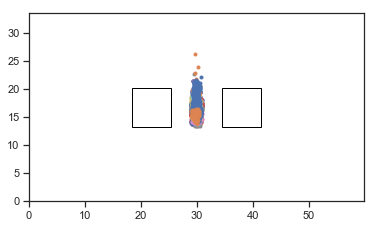

In [26]:
gaze_plot(gaze_three)
plt.show()

In [ ]:
cent  =  (59.8/2, 33.6/2)
left  =  (59.8/2 - 4 - 3.5, 33.6/2)
right =  (59.8/2 + 4 + 3.5, 33.6/2)

# behav_full['Cprop'],behav_full['Lprop'],behav_full['Rprop'] = np.nan, np.nan, np.nan

behav_full['two_box'],behav_full['three_box'] = np.nan,np.nan

counter = 0
for sub in behav_full['Subject'].unique():
    counter+=1
    print(counter)
    for run in behav_full['Run'].unique():
        for trial in behav_full[behav_full['Trial Type']=='Presentation']['Trial'].unique():
            behav_full.ix[(behav_full['Subject'] == sub) &
                     (behav_full['Run'] == run) &
                     (behav_full['Trial'] == trial)
                    ,'three_box'] = float(gaze_box(eye_df[(eye_df['Subject'] == str(sub)) &
                                                        (eye_df['Run'] == str(run)) &
                                                        (eye_df['Trial'] == trial)], 
                                                 cent, (6,33.6))[1])
            
#             behav_full.ix[(behav_full['Subject'] == sub) &
#                      (behav_full['Run'] == run) &
#                      (behav_full['Trial'] == trial)
#                     ,'three_box'] = gaze_box(eye_df[(eye_df['Subject'] == str(sub)) &
#                                            (eye_df['Run'] == str(run)) &
#                                            (eye_df['Trial'] == trial)
#                                           ], cent, (3,3))[1]
            
            
#             behav_full.ix[(behav_full['Subject'] == sub) &
#                      (behav_full['Run'] == run) &
#                      (behav_full['Trial'] == trial)
#                     ,'Rprop'] = gaze_box(eye_df[(eye_df['Subject'] == str(sub)) &
#                                            (eye_df['Run'] == str(run)) &
#                                            (eye_df['Trial'] == trial)
#                                           ], right, (7,7))[1]
            
#             behav_full.ix[(behav_full['Subject'] == sub) &
#                      (behav_full['Run'] == run) &
#                      (behav_full['Trial'] == trial)
#                     ,'Lprop'] = gaze_box(eye_df[(eye_df['Subject'] == str(sub)) &
#                                            (eye_df['Run'] == str(run)) &
#                                            (eye_df['Trial'] == trial)
#                                           ], left, (7,7))[1]
            
            
#             behav_full.ix[(behav_full['Subject'] == sub) &
#                      (behav_full['Run'] == run) &
#                      (behav_full['Trial'] == trial)
#                     ,'Cprop'] = gaze_box(eye_df[(eye_df['Subject'] == str(sub)) &
#                                            (eye_df['Run'] == str(run)) &
#                                            (eye_df['Trial'] == trial)
#                                           ], cent, (9,33.6))[1]
            

In [ ]:
behav_full[behav_full['three_box']==1]['Subject'].unique()

In [15]:
behav_full.head()

,Unnamed: 0,Subject,Trial Type,Run,Cued Composite,Uncued Composite,Cued Face,Cued Place,Uncued Face,Uncued Place,...,Attention Level,Cue Validity,Post Invalid Cue,Pre Invalid Cue,Attention Button,Rating History,Stimulus Onset,Stimulus End,Attention Probe,Trial
0,150,8.0,Presentation,3.0,00532960627fa_sunaccdtpgenvcbcbcf.jpg,00288940422fa_sunabppokiyglaxpcha.jpg,00532960627fa.jpg,sunaccdtpgenvcbcbcf.jpg,00288940422fa.jpg,sunabppokiyglaxpcha.jpg,...,NaN,1.0,NaN,NaN,1.0,NaN,1.551381e+09,1.551381e+09,x,0.0
1,151,8.0,Presentation,3.0,00787960620fa_sunagoufulkpsxrmklt.jpg,00857940307fa_sunaiwfobocrruqznsv.jpg,00787960620fa.jpg,sunagoufulkpsxrmklt.jpg,00857940307fa.jpg,sunaiwfobocrruqznsv.jpg,...,NaN,1.0,NaN,NaN,3.0,NaN,1.551381e+09,1.551381e+09,o,1.0
2,152,8.0,Presentation,3.0,00130931230fa_sunaamvxnvouicstkjb.jpg,00568940928fa_sunacsdhbbsybcyxnel.jpg,00130931230fa.jpg,sunaamvxnvouicstkjb.jpg,00568940928fa.jpg,sunacsdhbbsybcyxnel.jpg,...,NaN,1.0,NaN,NaN,1.0,NaN,1.551381e+09,1.551381e+09,x,2.0
3,153,8.0,Presentation,3.0,00967960627fa_sunbaejotfklekvpxcz.jpg,00929960627fa_sunaprnrbmgkomdbchr.jpg,00967960627fa.jpg,sunbaejotfklekvpxcz.jpg,00929960627fa.jpg,sunaprnrbmgkomdbchr.jpg,...,NaN,1.0,NaN,NaN,1.0,NaN,1.551381e+09,1.551381e+09,x,3.0
4,154,8.0,Presentation,3.0,00062931230fb_sunaaelotvjgibjtjhs.jpg,00663941121fa_sunadnjjzohjhbohlwq.jpg,00062931230fb.jpg,sunaaelotvjgibjtjhs.jpg,00663941121fa.jpg,sunadnjjzohjhbohlwq.jpg,...,NaN,1.0,NaN,NaN,3.0,NaN,1.551381e+09,1.551381e+09,o,4.0


### Plot prop of gazepoints by region

In [16]:
# group = behav_full.groupby(['Subject'], as_index=False).mean()
# df = group.melt(value_vars=['Lprop', 'Cprop', 'Rprop'], value_name='vals')
# ax = sb.violinplot(data=df, x ='variable', y='vals')
# ax.set(xlabel='Gaze Location', ylabel='Proportion of Gazepoints')

### Add props to memory images

In [ ]:
def add_prop_small(df):
    '''
    input: df containing pres and mem from single run
    output: df with proportion of eye gaze for every image in memory block
    '''

    #cued_cat = df[df['Trial Type']=='Presentation']['Cued Category'].tolist()[0]

    df['Image Prop']  = 0.0
    df['Three Box'] = np.nan

    for index,row in df.iterrows():
        # for every memory trial
        if row['Trial Type']=='Memory' and row['Attention Level']!='Novel':
            mem_image = row['Memory Image']
            mem_level = row['Attention Level']

            if mem_level in ['Full', 'Side']:
                cue = 'Cued '
                for cat in ['Face', 'Place']:
                    if df.loc[df['Cued '+cat] == mem_image].shape[0]!=0:
                        
#                         if df.loc[df[cue+cat] == mem_image]['Cued Side'].item()=='<':
#                             image_prop = df.loc[df[cue+cat] == mem_image]['Lprop'].item()
#                         else:
#                             image_prop = df.loc[df[cue+cat] == mem_image]['Rprop'].item()

                        center_prop = df.loc[df[cue+cat] == mem_image]['three_box'].item()

            elif mem_level in ['Category', 'None']:
                for cat in ['Face', 'Place']:
                    cue = 'Uncued '
                    if df.loc[df['Uncued '+cat] == mem_image].shape[0]!=0:
#                         if df.loc[df[cue+cat] == mem_image]['Cued Side'].item()=='>':
#                             image_prop = df.loc[df[cue+cat] == mem_image]['Lprop'].item()
#                         else:
#                             image_prop = df.loc[df[cue+cat] == mem_image]['Rprop'].item()

                        center_prop = df.loc[df[cue+cat] == mem_image]['three_box'].item()

            else:
                image_prop  = np.nan
                center_prop = np.nan

            #df['Image Prop'][index]  = image_prop
            df['Three Box'][index] = center_prop

#     mem_mask = df['Trial Type']=='Memory'
#     df.loc[mem_mask,'Image Prop'] = df.loc[mem_mask,'Image Prop'].fillna('Novel')
#     df.loc[mem_mask,'Center Prop'] = df.loc[mem_mask,'Center Prop'].fillna('Novel')

    return(df)

In [348]:
eye_df['Subject'].unique()

array(['8', '15', '1'], dtype=object)

In [346]:
# # RUN THIS CELL OVERNIGHT

f = []
for x in eye_df['Subject'].unique():
    print(x)
    f.append(add_prop_small(behav_full[behav_full['Subject']==int(x)]))
    print(x)

8
8
15
15
1


KeyboardInterrupt: 

In [351]:
f[0]['Three Box'].unique()

array([       nan, 0.02666667, 0.01020408, 0.01923077, 0.        ,
       0.01298701, 0.95890411, 0.92      , 0.96103896, 0.88      ,
       0.8625    , 0.96774194, 0.15555556, 0.92537313, 0.96825397,
       0.95588235, 0.98717949, 0.92424242, 0.97468354, 0.86764706,
       0.9875    , 0.89473684, 0.98648649, 0.89189189, 0.94666667,
       0.95061728, 1.        , 0.98630137, 0.87878788, 0.9382716 ,
       0.79746835, 0.95      , 0.90540541, 0.72      , 0.80597015,
       0.87179487, 0.96153846, 0.8490566 , 0.88311688, 0.95121951,
       0.87671233, 0.93243243, 0.71428571, 0.72093023, 0.94736842,
       0.78666667, 0.6875    , 0.88157895, 0.21212121, 0.97560976,
       0.975     ])

# Regression

In [11]:
# pickle.dump(f, open("/Users/kirstenziman/Desktop/attention-memory-task/gaze.pkl", "wb" ))

# Load Processed Eye Data

In [12]:
with open("/Users/kirstenziman/Documents/attention-memory-task/gaze.pkl",'rb') as fp:
    eye_df = pickle.load(fp)

# Update eye_df label

In [13]:
x = pd.concat(eye_df)
x['Familiarity_Rating'] = x['Familiarity Rating']

## for each subject, do gaze proportion regression

In [ ]:
e

In [10]:
new_f = []

for idx,x in enumerate(eye_df):
    #print(x['Subject'].unique())
    
    #if x['Subject'].unique():
        
    d=[]; a=[]
    x['Familiarity_Rating'] = x['Familiarity Rating']
    x[ 'Gaze_Proportion'  ] = x[ 'Image Prop'  ]
    x[ 'AL'  ] = x[ 'Attention Level'  ]

    # set gaze proportion foir all novel images equal to zero
    x.loc[x.AL == 'Novel', 'Gaze_Proportion'] = 0

    # do a regression on eye gaze and rating
    model = smf.ols(formula = "Familiarity_Rating ~ Gaze_Proportion", data = x)
    reg = model.fit()

    # append to d a dataframe of residuals 
    d.append(pd.DataFrame(reg.resid))
    # add regression to dataframe
    x = pd.concat([pd.concat(d), x], axis=1, sort=False)
    new_f.append(x)

TypeError: string indices must be integers

In [15]:
full = pd.concat(new_f)

In [16]:
len(full['Subject'].unique())

30

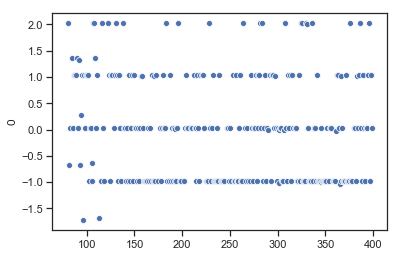

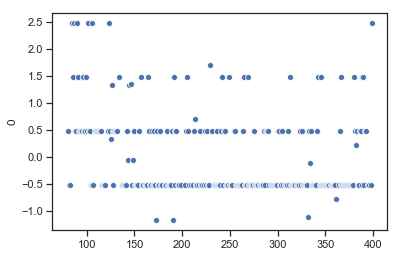

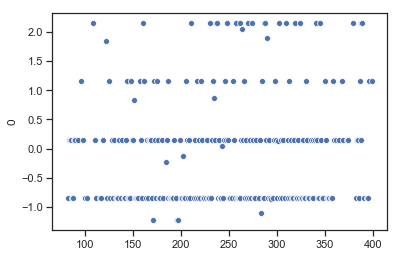

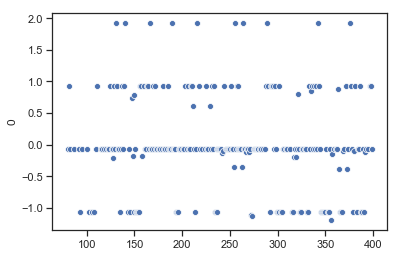

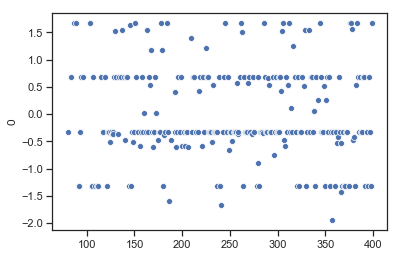

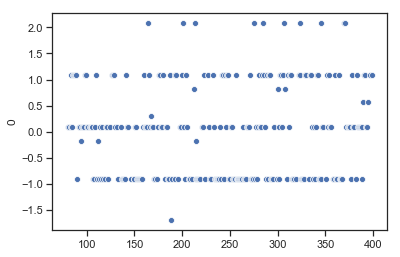

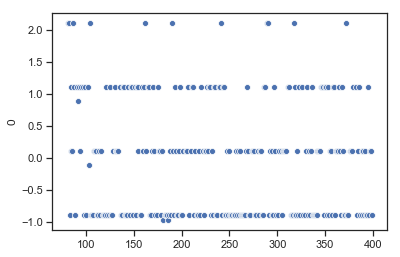

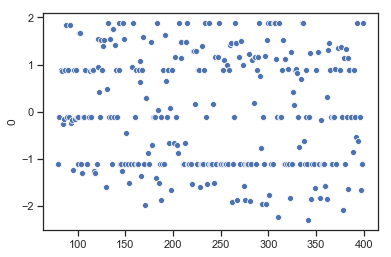

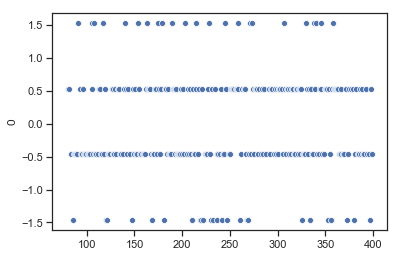

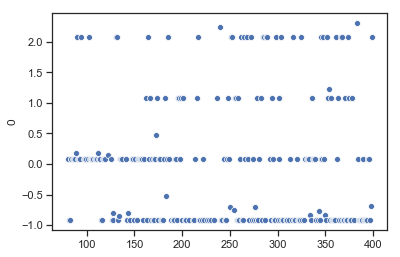

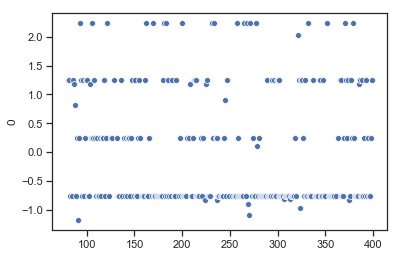

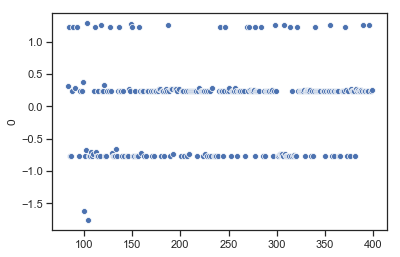

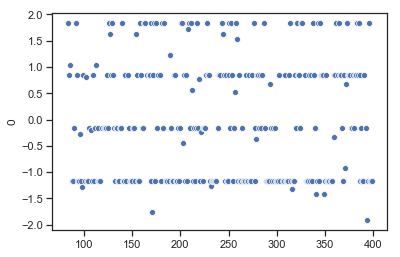

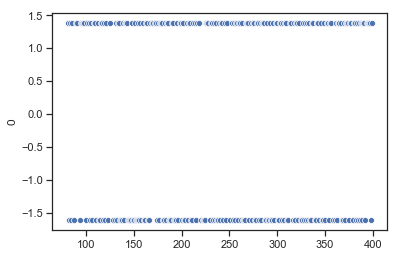

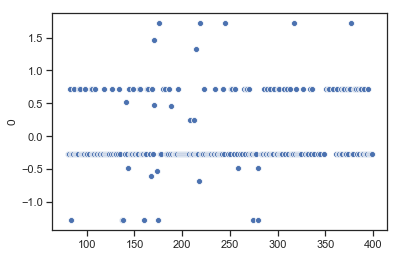

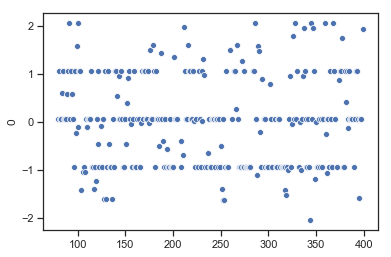

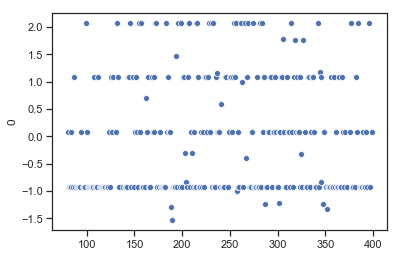

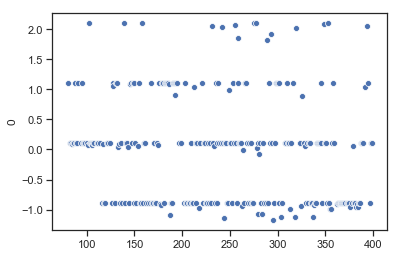

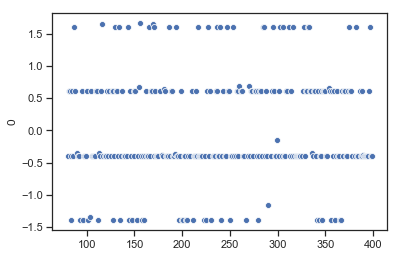

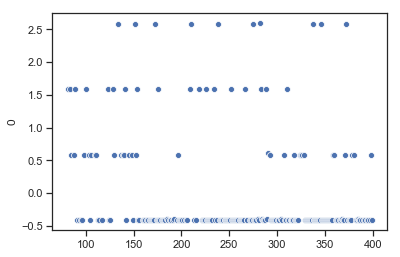

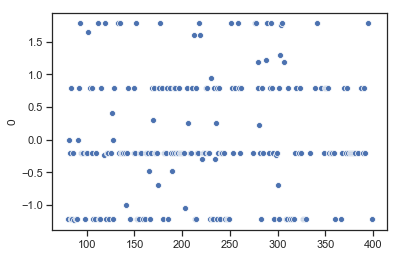

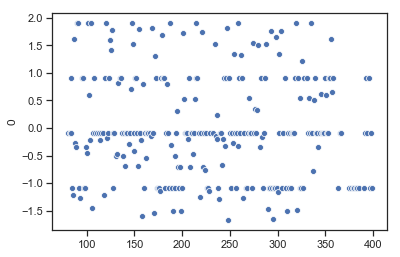

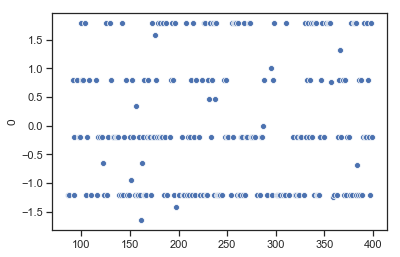

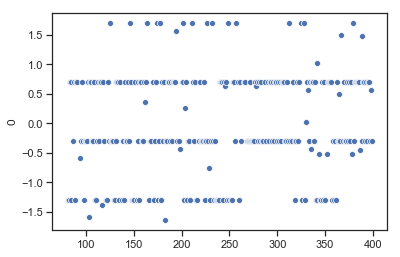

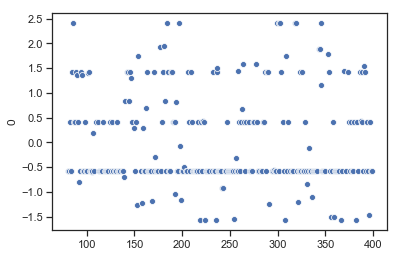

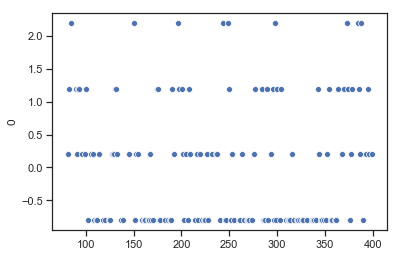

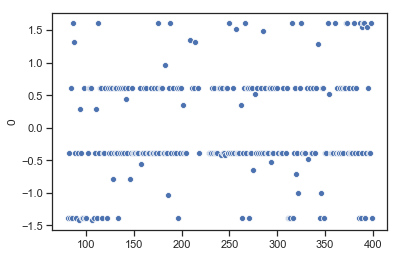

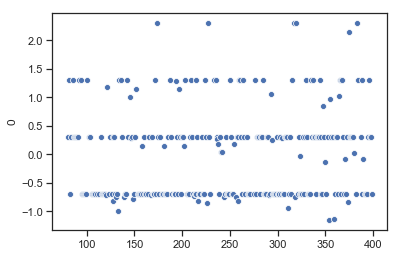

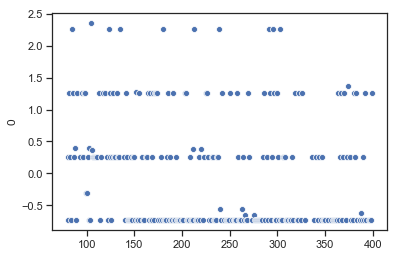

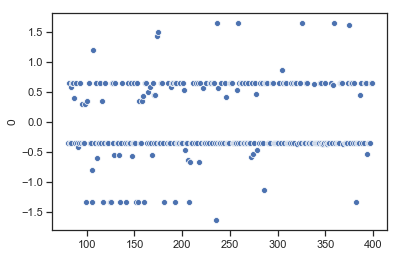

In [17]:
for x in list(full['Subject'].unique()):
    data = full[full['Subject']==x]
    sb.scatterplot(range(0, data.shape[0]), data[0])
    plt.show()

### Subtract Residuals

In [18]:
# ALEX - skip this 

#full = pd.DataFrame.from_csv("/Users/kirstenziman/Desktop/attention-memory-task/full.csv")

In [19]:
full['Adjusted'] = full['Familiarity Rating'] - full[0]

In [20]:
# CATEGORY - PLACES VS FACES
full.ix[full['Memory Image'].str.contains("sun", na=False),'Category']='Place'
full.ix[~full['Memory Image'].str.contains("sun", na=False),'Category']='Face'

grouped = full.groupby(['Subject', 'Attention Level', 'Category'], as_index=False).mean()
grouped.head()

,Subject,Attention Level,Category,0,Unnamed: 0,Run,Attention Reaction Time (s),Familiarity Reaction Time (s),Familiarity Rating,Cue Validity,...,Stimulus End,Trial,Cprop,Lprop,Rprop,Image Prop,Center Prop,Familiarity_Rating,Gaze_Proportion,Adjusted
0,0,Category,Face,0.195163,229.733333,4.0,NaN,1.096333,2.384615,NaN,...,1.550772e+09,NaN,NaN,NaN,NaN,0.000000,0.991774,2.384615,0.000000,2.204837
1,0,Category,Place,0.118082,192.240000,3.2,NaN,1.376160,2.480000,NaN,...,1.550771e+09,NaN,NaN,NaN,NaN,0.003367,0.969904,2.480000,0.003367,2.245554
2,0,Full,Face,-0.485099,226.600000,4.0,NaN,1.212133,2.000000,NaN,...,1.550772e+09,NaN,NaN,NaN,NaN,0.013551,0.982920,2.000000,0.013551,2.385099
3,0,Full,Place,0.700162,188.200000,3.2,NaN,1.170720,3.041667,NaN,...,1.550771e+09,NaN,NaN,NaN,NaN,0.020578,0.975474,3.041667,0.020578,2.453684
4,0,None,Face,-0.154645,193.160000,3.2,NaN,1.147120,2.173913,NaN,...,1.550771e+09,NaN,NaN,NaN,NaN,0.003367,0.969904,2.173913,0.003367,2.245554


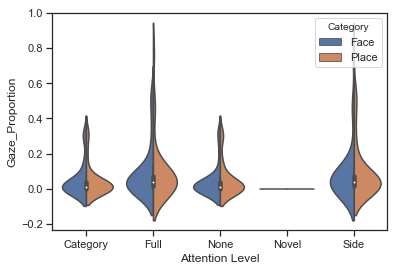

In [21]:
sb.violinplot(y = 'Gaze_Proportion', x = 'Attention Level', hue='Category', split=True, data = grouped)

# EXP 2 : Eye Gaze Regression

We have taken the proportion of gazepoints directly on each image regressed out that effect, on a subject-wise basis. <br /><br />This is a non-standard approach but allows us to save all of the data.

In [175]:
sb.barplot(x='Attention Level', y='Adjusted', data=grouped)

NameError: name 'grouped' is not defined

In [174]:
import statsmodels.api as sm
grouped['FR'] = grouped['Adjusted']
grouped['AL'] = grouped['Attention Level'   ]
pingouin.rm_anova(dv='FR', within=['AL','Category'], subject='Subject', data=grouped)
# pingouin.rm_anova(dv='FR', within=['AL'], subject='Subject', data=grouped)

NameError: name 'grouped' is not defined

In [173]:
pair = combinations(grouped['AL'].unique(),2) 
   
for i in list(pair): 
   
    p = scipy.stats.ttest_rel(grouped[grouped['AL']==i[0]]['Familiarity_Rating'], 
                          grouped[grouped['AL']==i[1]]['Familiarity_Rating'])
    
    if p[1] <.05:
        print(i)
        print('p = ' + str(p[1]))
        print(' ')

NameError: name 'grouped' is not defined

# EXP2: ANOVA - Gaze at Center

In [25]:
full_gaze_A = full[full['Center Prop'] == 1.0]
full_gaze_B = full[full['AL'] == 'Novel']
full_gaze = pd.concat([full_gaze_A, full_gaze_B])

In [26]:
full_gaze.to_csv('/Users/kirstenziman/Documents/attention-memory-task/Center_Prop_Data.csv')

In [27]:
grouped_again = full_gaze.groupby(['Subject', 'Attention Level', 'Category'], as_index=False).mean()
grouped_again['Attention Level'].unique()

array(['Category', 'Full', 'None', 'Novel', 'Side'], dtype=object)

In [28]:
print(len(full['Subject'].unique()) )
print(len(full_gaze['Subject'].unique()) )
print(len(grouped_again['Subject'].unique()))

30
30
30


# EXP2: ANOVA - Gaze at Center

 Vision papers on covert attention get rid of trials where subejcts look away from fixation.<br /> <br /> 
This was the repeated recommendation at EPSCOR meetings, but we preferred to preserve all of our data and to be able to generalize our findings to MRI data. <br /><br />Here, we decide to look at ratings from images viewed on trials where subjects only gazed between images.

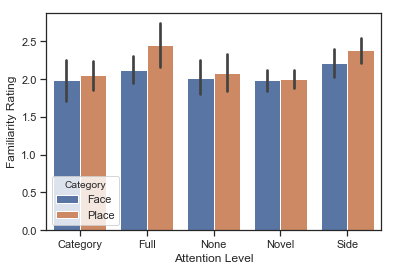

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Attn_Level,5.504,4,116,1.376,8.233,7.017207e-06,0.000150,0.221,0.667
1,Category,1.060,1,29,1.060,2.178,1.508176e-01,0.150818,0.070,1.000
2,Attn_Level * Category,1.058,4,116,0.265,16.142,1.550484e-10,0.000009,0.358,0.439


In [30]:
import statsmodels.api as sm
grouped_again = full_gaze.groupby(['Subject', 'Attention Level', 'Category'], as_index=False).mean()
grouped_again['FR'] = grouped_again['Familiarity Rating']
grouped_again['Attn_Level'] = grouped_again['Attention Level'   ]
sb.barplot(x='Attention Level', y='Familiarity Rating',  hue='Category', data=grouped_again)
plt.show()
pingouin.rm_anova(dv='FR', within=['Attn_Level','Category'], subject='Subject', data=grouped_again)

In [30]:
# l = grouped_again['Attention Level'].unique()
# for pair in list(itertools.combinations(l, r=2)):
#     t = stats.ttest_rel(sub_split[sub_split['Attention Level']==pair[0]]['Familiarity Rating'], 
#                         sub_split[sub_split['Attention Level']==pair[1]]['Familiarity Rating'])    
#     if t[1]<.05:
#         print(pair[0]+" vs. "+pair[1])
# pingouin.ttest()

### ANOVA with data where no gaze at image

In [31]:
full_gaze = full[full['Image Prop'] == 0]
grouped_again = full_gaze.groupby(['Subject', 'Attention Level', 'Category'], as_index=False).mean()
grouped_again['FR'] = grouped_again['Familiarity Rating']
grouped_again['Attn_Level'] = grouped_again['Attention Level'   ]

pingouin.rm_anova(dv='FR', within=['Attn_Level','Category'], subject='Subject', data=grouped_again)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Attn_Level,4.065,3,84,1.355,7.183,0.000238,0.001082,0.204,0.740
1,Category,2.065,1,28,2.065,5.759,0.023299,0.023299,0.171,1.000
2,Attn_Level * Category,1.194,3,84,0.398,6.700,0.000414,0.005671,0.193,0.513


In [32]:
print(len(full['Subject'].unique()) )
print(len(full_gaze['Subject'].unique()) )
print(len(grouped_again['Subject'].unique()))

30
30
29


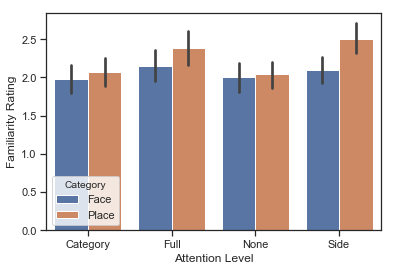

In [33]:
sb.barplot(x='Attention Level', y='Familiarity Rating', hue='Category', data=grouped_again)

In [34]:
a = full_gaze[ (full_gaze['Trial Type']=='Memory') & (full_gaze['Attention Level']!='Novel') ].shape[0]
b = full[ (full['Trial Type']=='Memory') & (full['Attention Level']!='Novel') ].shape[0]

print('Total proportion of prev-seen mem images utilized:')
a/b

Total proportion of prev-seen mem images utilized:


0.485

In [35]:
m = full_gaze[full_gaze['Trial Type']=='Memory'].groupby('Subject')['Center Prop'].mean()

m

Subject
0     0.988578
1     0.967035
2     0.689884
3     0.921856
4     0.994803
5     0.790221
7     0.986766
8     0.890836
10    0.991014
12    0.882399
13    0.837164
14    0.958756
15    0.922117
16    0.977533
17    0.968296
18    0.836858
19    0.906667
20    0.885006
21    0.999792
22    0.232115
23    0.967014
24    0.295737
25    0.947629
26    0.888377
27    0.679690
28    0.997091
29    0.983437
33    0.971278
34    0.990984
Name: Center Prop, dtype: float64

# Try with R

In [ ]:
%R -i full

In [ ]:
%R full

# Graveyard

In [ ]:
params = {'runs':8, 'presentations_per_run':10, 
          'invalid_cue_percentage':10, 'mem_to_pres':4, 
          'mem_pres_split':2}

dr = '/Users/student/Desktop/attention-memory-task/data/'

In [ ]:
class parseFile():
    def __init__(self, file):
        self.file = file
    def parse(self):
        data = open(self.file).read()
        return(data)

In [ ]:
def df_create(data):
    """
    input: raw parsed eye data
    output: dataframe of eye data (screen location in centimeters)
    """

    dict_list = [ast.literal_eval(x) for x in data]
    dict_list = [x['values']['frame'] for x in dict_list if 'frame' in x['values']]

    df = pd.DataFrame(dict_list)

    # right and left eye
    for eye in ['righteye','lefteye']:
        for coord in ['x','y']:
            df[coord+'Raw_'+eye] = [df[eye][row]['raw'][coord] for row in df.index.values]

    # convert to centimeters
    df['av_x_coord'] = (59.8/2048)*(df[['xRaw_righteye', 'xRaw_lefteye']].mean(axis=1))
    df['av_y_coord'] = (33.6/1152)*(df[['yRaw_righteye', 'yRaw_lefteye']].mean(axis=1))

    # convert timestamp
    df['timestamp']=[time.mktime(time.strptime(x[:], "%Y-%m-%d %H:%M:%S.%f")) for x in df['timestamp']]

    return(df)

# Subject Overview

In [ ]:
def gaze_plot(df_list):

    middle = 2048/2.0
    quarter = (1304-744)/4.0

    fig = plt.figure()
    ax1 = fig.add_subplot(111, aspect='equal')

    for x in df_list:
        if x['Cued Side'].all()=='>' and x['Cued Category'].all()=='Place':
            color='green'
        elif x['Cued Side'].all()=='>' and x['Cued Category'].all()=='Face':
            color='blue'
        elif x['Cued Side'].all()=='<' and x['Cued Category'].all()=='Place':
            color='orange'
        else:
            color='red'

        x['Color']=color

        ax1.plot(x['av_x_coord'], x['av_y_coord'], '.', color=color)
        #props.append(x.loc[(x['av_x_coord']>middle-quarter) & (x['av_x_coord']<middle+quarter)])

    rect1 = patches.Rectangle(((59.8/2.0)-8-3.5,(33.6/2)-3.5),7,7,linewidth=1,edgecolor='black',facecolor='none')
    rect2 = patches.Rectangle(((59.8/2.0)+8-3.5,(33.6/2)-3.5),7,7,linewidth=1,edgecolor='black',facecolor='none')

    # Add the patch to the Axes
    ax1.add_patch(rect1)
    ax1.add_patch(rect2)
    
    plt.ylim(0, 33.6)
    plt.xlim(0, 59.8)
    
    return(fig)

In [115]:
import matplotlib.patches as patches
from matplotlib.backends.backend_pdf import PdfPages

data_dir = '/Users/kirstenziman/Downloads/2.21.19AM0-4/'
df_lists = []

for sub in os.listdir(data_dir):

    print()
    print(sub)


    # Eye Gaze
    loaded = load(data_dir+sub+'/'+'eye_data/')
    df = df_create(loaded)
    df_list = pres_gaze(data_dir+sub, df, interval='images')
    gp=gaze_plot(df_list)
    gp.savefig("gp"+sub+".pdf", bbox_inches='tight')
    df_lists.append(df_list)


1_2019_Feb_21


KeyboardInterrupt: 

In [9]:
# for x in df_lists:
#     sb.boxplot(gaze_props(x))
#     plt.show()
#     print(len(x))

len(df_lists)

5

In [12]:
import scipy

for subject in df_lists:
    rl_dict = {'right':[],'left':[]}
    dct={'>_Face':rl_dict,'>_Place':rl_dict,'<_Face':rl_dict,'<_Place':rl_dict}
    
    for trial in subject:
        # right = number gazepoints right half of screen
        # left = number of gazepoints left half of screen
        side = trial.iloc[0]['Cued Side']
        cat = trial.iloc[0]['Cued Category']
        dct[side+'_'+cat]['right'].append(trial.loc[trial['av_x_coord'] > 59.8/2].shape[0])
        dct[side+'_'+cat]['left'].append(trial.loc[trial['av_x_coord'] < 59.8/2].shape[0])
        
    x = dct['>_Face']['right']+dct['>_Place']['right']
    y = dct['<_Face']['right']+dct['<_Place']['right']
    scipy.stats.ttest_ind(x, y) #, axis=0, equal_var=True, nan_policy='propagate')
        

IndexError: single positional indexer is out-of-bounds

In [ ]:
def add_level(df, trials='block'):
    '''
    input: subject dataframe
    output: subject dataframe w/ av gaze coord for each Memory trial row
    '''
    for x in df.Run.unique():
        mask = df['Run']==x

        if trials == 'block':
            df[mask] = run_level(df[mask])
        elif trials == 'unique':
            df[mask] = run_level_unique(df[mask])

    return(df)


def run_level_unique(df):
    '''
    input: df containing pres and mem from single run
    output: df with string in 'Attention Level' column in each Memory trial row
    '''

    # cued_cat = df[df['Trial Type']=='Presentation']['Cued Category'].tolist()[0]

    for index,row in df[df['Trial Type']=='Memory'].iterrows():

        mem_image = row['Memory Image']
        for cue in ['Cued ', 'Uncued ']:
            for cat in ['Face', 'Place']:
                if df.loc[df[cue+cat] == mem_image].shape[0]!=0:
                    # x_gaze = df.loc[df[cue+cat] == mem_image]['av_x_coord']
                    df['av_x_coord'][index] = df.loc[df[cue+cat] == mem_image]['av_x_coord']

#     mem_mask = df['Trial Type']=='Memory'
#     df.loc[mem_mask,'av_x_coord'] = df.loc[mem_mask,'Attention Level'].fillna('Novel')

    return(df)